In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms
from operators.gaussian_blur import GaussianBlur
from variational_models.patch_nr_vm import PatchNr_VM
import torch

In [2]:
transformPIL = transforms.Compose([transforms.PILToTensor()])

In [3]:
file = "../data/set12/01.png"
image = transformPIL(Image.open(file))

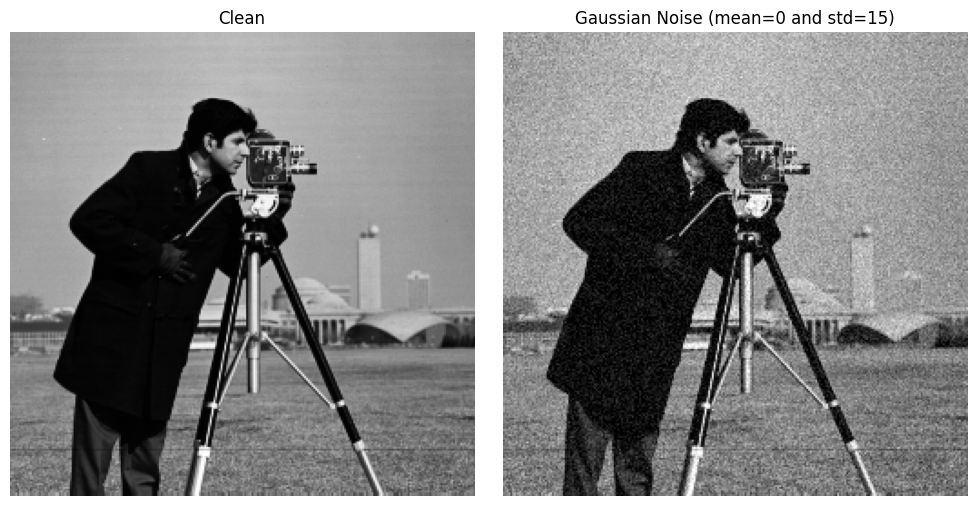

In [8]:
mean = 0
std = 15
noise = np.random.normal(mean, std, image.shape)
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image on the left subplot
axes[0].imshow(image.squeeze(), cmap='gray')
axes[0].set_title('Clean')
axes[0].axis('off')

deg_image = torch.clip(image + noise, 0, 255)

# Display the second image on the right subplot
axes[1].imshow(deg_image.squeeze(), cmap='gray')
axes[1].set_title(f'Gaussian Noise (mean={mean} and std={std})')
axes[1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [9]:
k = 7
std = 3
deg_image.shape

torch.Size([1, 256, 256])

In [10]:
blur = GaussianBlur(k, std)
padding = transforms.Pad([k//2,], padding_mode="edge")
deg_blurred_image = blur(padding(deg_image).float())

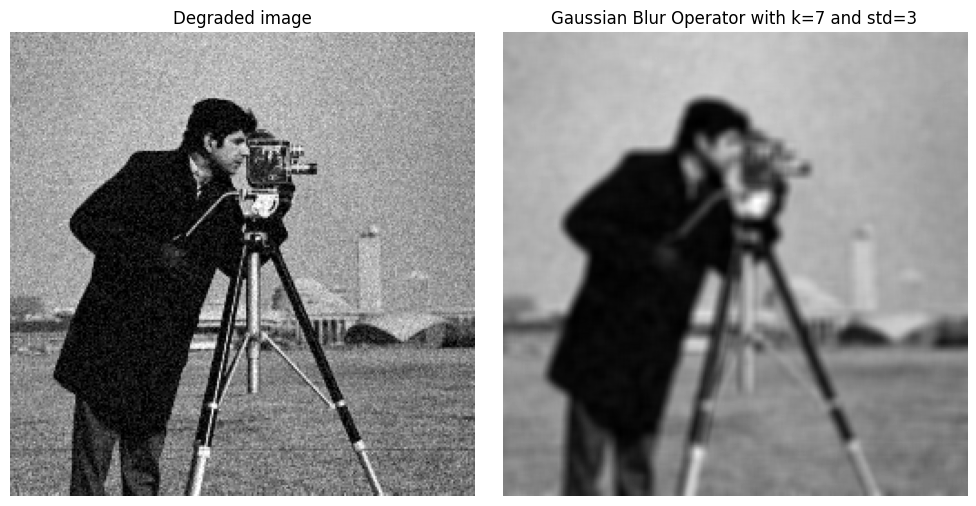

In [11]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image on the left subplot
axes[0].imshow(deg_image.squeeze(), cmap='gray')
axes[0].set_title('Degraded image')
axes[0].axis('off')

# Display the second image on the right subplot
axes[1].imshow(deg_blurred_image.squeeze(), cmap='gray')
axes[1].set_title(f'Gaussian Blur Operator with k={k} and std={std}')
axes[1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [10]:

patch_nr_vm_model = PatchNr_VM()

array([[[-1.46329777, -1.77732704, -5.71394118, ..., -3.32150028,
         -0.9696038 ,  3.9964727 ],
        [ 2.53663948, -0.17124369, -0.20518068, ..., -1.95502129,
         -3.67732821,  3.92926081],
        [ 0.11994887,  5.6384783 , -2.1178339 , ...,  1.13266604,
         -2.15969812, -0.72404702],
        ...,
        [ 1.12641363, -1.40610705,  0.92938953, ..., -2.97121078,
          1.22060953,  1.94955832],
        [ 2.10185059,  2.78618659, -0.50405477, ...,  1.31903698,
          2.95625854,  0.74984404],
        [-0.24374857, -2.34771943, -4.09681735, ..., -0.09610948,
          1.57670085,  1.98302383]]])